<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/Train_Test_Split_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Test Split Exercise

**Task**

This is a modified version of the task from last week. Your goal is to perform linear regression and KNN for the regression task of using the abalone dataset to predict age from its features. The difference is that you are to do the task with and without train test split.

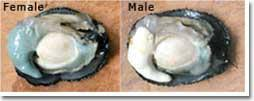

**Questions to think about and answer**

After you have completed the task, answer the following questions:

1. Which of KNN or linear regression seemed like a better model when you didn't use train test split? 
2. Which of KNN or linear regression seemed like a better model when you used train test split? 
3. Was there an advantage to linear regression in terms the amount of code you had to write? 
4. Is there any way you could show someone which of the two models was more effective? 
5. Is there any way you think you could have improved KNN to be more effective of a model? 

**Data Dictionary:**

**Attribute** | **Data Type** |  **Data Sub**|  **Description**
--- | --- | --- | ---
**Sex** | categorical | nominal | 3 categories (M, F, I)
**Length** | numerical | continuous | Longest shell measurement
**Diameter** | numerical | continuous | perpendicular to length
**Height** | numerical | continuous | with meat in shell
**Whole weight** | numerical | continuous | whole abalone
**Shucked weight** | numerical | continuous | weight of meat
**Viscera weight** | numerical | continuous | gut weight (after bleeding)
**Shell weight** | numerical | continuous | after being dried
**Rings**  | numerical | continuous | +1.5 gives the age in years
**Age**  | numerical | continuous | count rings +1.5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
column_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 
                'shucked weight', 'viscera weight', 'shell weight', 'rings', 'age']

data = pd.read_csv('/content/drive/MyDrive/abalone.data', names=column_names)
data.age.fillna(0,inplace=True)
data.age = data.rings + 1.5
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [ ]:
data.info()
# sex == categorical feature 
# all others == continuous feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


# Preprocessing & Training Function

In [ ]:
# Test: Pandas get_dummies
pd.get_dummies(data['sex'])

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [ ]:
# Define function to take in a data name, target name, task type (regression or classification)

def preprocess_and_train(df, target, task):
    df = df.copy()
  
    # If the sex column is not the target, ohe it
    if target != 'sex':                             
      dummies = pd.get_dummies(df['sex'])
      df = pd.concat([df, dummies], axis=1)
      df = df.drop('sex', axis=1)

    # Spit the in target and df features
    y = df[target].copy()
    # feature matrix is going to equal everything except the target >>> drop target
    X = df.drop(target, axis=1).copy()

    # Train-test split >>> shuffle the data and split a percent into the train set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3) # 80%; ensure split is constant

    # Scale X >>> give each column similar range of values (mean == 0 and var == 1)
    scaler = StandardScaler()
    scaler.fit(X_train)

    # Transform X_train and X_test >>> convert from np array to DataFrame
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

    # Define model
    if task == 'kregression':
      model = KNeighborsRegressor()
    elif task == 'lregression':
      model = LinearRegression()
    
    # Fit model to train set
    model.fit(X_train,y_train)

    # Return the test results >> measure of how dispursed data is from set
    # regression.score return R^2
    # classification.score return accuracy 
    return model.score(X_test, y_test)

# template == X_train, X_test, y_train, y_test = preprocess_and_train(data, target='rings', task='classification')

# Predict Age using KNN Regression Model - Using Train Test Split

In [ ]:
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [ ]:
results = preprocess_and_train(data, target='age', task='kregression')
print('Age KNN Regression R^2: {:.4f}'.format(results))

Age KNN Regression R^2: 0.9786


# Predict Age using Linear Regression Model - Using Train Test Split




In [ ]:
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [ ]:
results = preprocess_and_train(data, target='age', task='lregression')
print('Age Linear Regression R^2: {:.4f}'.format(results))

Age Linear Regression R^2: 1.0000


# Predict Age using KNN Regression Model - Without Using Train Test Split

In [ ]:
# feature matrix
X = data.drop(columns= ['age', 'sex'])
# target matrix
y = data.loc[:, 'age'].values

model_kn = KNeighborsRegressor()
model_kn.fit(X,y)
predictions = model_kn.predict(X)
score = model_kn.score(X,y)
print('Age KNN Regression R^2: {:.4f}'.format(score))

Age KNN Regression R^2: 0.9998


# Predict Age using Linear Regression Model - Without Using Train Test Split

In [ ]:
# feature matrix
X = data.drop(columns= ['age', 'sex'])
# target matrix
y = data.loc[:, 'age'].values

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X,y)
predictions = model_lr.predict(X)
score = model_lr.score(X,y)
print('Age Linear Regression R^2: {:.4f}'.format(score))

Age Linear Regression R^2: 1.0000


1. Which of KNN or linear regression seemed like a better model when you didn't use train test split? 

>     Linear regression seemed like the better model when the train test split was not used.

2. Which of KNN or linear regression seemed like a better model when you used train test split? 

>     Linear regression seemed like the better model when the train test split was used. 

3. Was there an advantage to linear regression in terms of the amount of code you had to write?

>     No, there was no material advantage to linear regression in terms of the amount of code. 

4. Is there any way you could show someone which of the two models was more effective?

>      Yes, you can show someone which of the two models was more effective by metrics used to measure accuracy. 

5. Is there any way you think you could have improved KNN to be more effective of a model? 

>     The model effectiveness could be potentially improved by increasing or reducing attributes in the feature matix.

**Citations**
1. https://www.youtube.com/watch?v=5YHWuUsoKEo
2. https://bids.github.io/2015-06-04-berkeley/intermediate-python/03-sklearn-abalone.html
3. https://towardsdatascience.com/k-nearest-neighbors-in-6-steps-efbcbebce54d
4. https://www.kaggle.com/arunkumarpyramid/abalone-age-prediction-dataset